## Introducción a Pandas (3)

Durante el curso vamos a estar desarrollando los aspectos prácticos utilizando Python. Para aquellos que no estén muy familiarizados con el lenguaje, acá tenemos una introducción a las bibliotecas que más vamos a manejar.

Si necesitan más material, algunos libros para consultar (si los quieren, los podemos compartir):
* Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython
* Pandas for Everyone: Python Data Analysis

Cuentan con una serie de notebooks introductorias:
* Creación, lectura y escritura.
* Indexando, seleccionando y asignando.
* **Tipos de datos, valores faltantes, funciones de resumen.**
* Agrupamientos y orden.
* Renombrado y combinación.

En cada notebook van a encontrar algunos ejericios (opcionales).

Las notebooks se encuentran basadas en diversos tutoriales de Kaggle y cursos de la Unversidad de Berkeley.

Vamos a trabajar con el ``DataFrame`` de tweets que teníamos en la notebook anterior.

In [ ]:
import pandas as pd

In [ ]:
df_tweets = pd.read_csv('tweets.csv',index_col = 0)
df_tweets

### Tipos de datos

El tipo de una columna de un ``DataFrame`` o de una ``Series`` se puede saber con ``dtype``.

In [ ]:
df_tweets['created_at'].dtype, df_tweets['user_id'].dtype, 

También podemos obtener el tipo de todas las columnas a la vez

In [ ]:
df_tweets.dtypes

Una consideración a tener es que las columnas que son ``str`` no tienen su tipo particular, sino que son ``object``.

Es posible convertir el tipo de una columna en otro, siempre y cuando la conversión tenga sentido utilizando ``astype``.

Por ejemplo, queremos cambiar el tipo de la columna ``replied_id`` de ``int64`` a ``float64``.

In [ ]:
df_tweets['replied_id'].astype('float64')

El index también tiene su propio ``dtype``.

In [ ]:
df_tweets.index.dtype

Cambiando formato de fechas

In [ ]:
df_tweets['created_at'].astype('datetime64[ns, US/Eastern]')

También hay casos especiales

In [ ]:
pd.to_datetime(df_tweets['created_at'])

Otra forma de obtener el tipo de todas las columnas y algunos datos adicionales es utilizar ``info``.

In [ ]:
df_tweets.info()

### Datos faltantes

Las celdas que no tienen valor se les da un ``na`` o ``NaN``. Por razones técnicas, los ``NaN`` son siempre de tipo ``float64``.

Como ya vimos, Pandas provee algunas funciones especiales para encontrar esos valores, reemplazarlos (``fillna``), e incluso borrar filas y columnas con valores faltantes con el ``dropna``.

Vamos a reemplazar los ``na`` de ``mentions`` por un indicador de lista vacía (el ``str`` ``[]``).

In [ ]:
df_tweets['mentions'] = df_tweets['mentions'].fillna('[]')
df_tweets['mentions']

Ahora que tenemos la columna sin ``na``, podemos hacer reemplazos por "tipo" más complejos. Por ejemplo, una interpretación literal de los valores. 

Considerar la columna ``mentions``, por como está escrita, pareciera que esperábamos que esa columna fuera una ``list``, pero como se la levantó de un ``.csv`` esa lista es un ``str`` plano. Para convertirlo nuevamente en lista podemos:

In [ ]:
import ast

In [ ]:
df_tweets['mentions'] = [ast.literal_eval(df_tweets['mentions'].values[i]) for i in range(0,len(df_tweets))]
type(df_tweets['mentions'].values[0])

Vamos a borrar aquellas filas que tengan valores faltantes en ``user_id``.

In [ ]:
df_tweets['user_id'].dropna()

Si quisieramos borrar las columnas que tengan algún valor ``na``, se puede especificar el ``axis`` sobre el cual se quiere aplicar el cambio.

In [ ]:
df_tweets.dropna(axis=1)

### Reemplazando valores

Además de usar el ``fillna`` para reemplazar los ``na``, podemos usar el ``replace`` para cambiar otros valores.

Por ejemplo, podemos usar el ``replace`` para cambiar los valores de ``retweeted_id`` inexistente (``-1``), por el valor 0.

Nota. Esta operación no se hace inplace en el ``DataFrame`` sino que crea uno nuevo.

In [ ]:
df_tweets['replied_user'].replace(-1,0)

### Datos duplicados

En este caso, la última fila aparece repetida. Podemos eliminarlas utilizando ``drop_duplicates``. Tiene varias opciones:
* ``first``. Eliminar los duplicados excepto por la primera ocurrencia (opción por defecto).
* ``last``. Eliminar todos los duplicados excepto por el último.
* ``False``. Borrar todos los duplicados.

In [ ]:
df_tweets.drop_duplicates()

Si observamos ``df_tweets`` vamos a ver que no se aplicaron los cambios, sino que en como varios casos anteriores la operación devolvió un nuevo ``DataFrame``. Para evitar eso y aplicar los cambios de forma directa, podemos utilizar el parámetro ``inplace=True``. Esta opción se encuentra disponible en una gran variedad de métodos, incluso de los que ya hemos utilizado.

In [ ]:
df_tweets.drop_duplicates(inplace=True)
df_tweets

La primera función que podemos utilizar es ``describe`` que nos permite ver determinadas estadísticas de cada una de las columnas, resumiendo la tendencia central, dispersión y forma de la distribución, excluyendo los ``na``.

Puede ser utilizado tanto sobre variables numéricas como variables categorías.

In [ ]:
df_tweets.describe()

### Transformaciones con funciones

Si bien es posible iterar sobre un ``DataFrame`` o ``Series`` como se haría con una lista, resulta ineficiente con datasets muy grandes. Para estos casos, existe ``apply`` que ptermine aplicar una función de transformación de los valores.

Por ejemplo, queremos usar una función para eliminar los números y puntuación del texto de los tweets.

In [ ]:
import re

def preprocess(t):
    return re.sub(r'[^a-zA-Z]|_', ' ', t) # eliminamos todo lo que no sean letras

Al invocar el método ``apply``, cada valor en la columna de ``text`` es pasado por la función de ``preprocess`` y al final retorna una nueva serie, la cual asigamos a la columna nueva ``text_mod``.

In [ ]:
df_tweets["text_mod"] = df_tweets["text"].apply(preprocess)
df_tweets["text_mod"] 

También se pueden utilizar funciones anónimas.

In [ ]:
df_tweets["text_length"] = df_tweets["text"].apply(lambda x : len(x.split(' ')))
df_tweets["text_length"]

### Funciones de resumen

Cómo obtener estadísticas de las diferentes ``Series`` o filas que componen el ``DataFrame``.

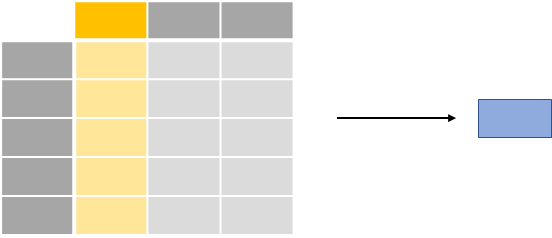

La primera función que podemos utilizar es ``describe`` que nos permite ver determinadas estadísticas de cada una de las columnas, resumiendo la tendencia central, dispersión y forma de la distribución, excluyendo los ``na``.

Puede ser utilizado tanto sobre variables numéricas como variables categorías.

In [ ]:
df_tweets.describe()

Estas estadísticas se pueden obtener de forma individual.

Por ejemplo, cuál es el promedio de ``retweets``?

In [ ]:
df_tweets['retweets'].mean()

Además de columnas individuales, se pueden aplicar sobre conjuntos de columnas.

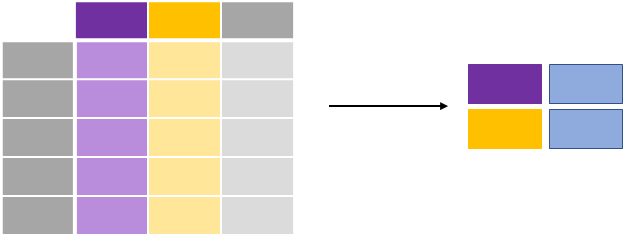

In [ ]:
df_tweets[['retweets','text_length']].mean()

También se puede utilizar la función ``agg`` para definir qué aplicar sobre cada columna particular.

In [ ]:
df_tweets.agg({
            "retweets": ["min", "max", "median", "skew"],
            "text_length": ["min", "max", "median", "mean"],
        })

Nota. En este caso calculamos todo sobre columnas, pero también se pueden calcular sobre las filas.
Hay alguna funciones más además de las que vimos acá, por ejemplo ``corr`` que calcular la correlación de Pearson entre cada par de ``Series``.

### Ejercicios

1. Contar la cantidad de elementos faltantes en la columna `replied_user`.

In [ ]:
# TODO

2. Cuantos likes promedio recibieron los tweets?

In [ ]:
# TODO

3. Agregar una columna que traduzca las cantidades de likes de los tweets en ``mas-media``, ``menos-media``.

In [ ]:
# TODO